In [28]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# plt.style.use("seaborn")
sns.set_context("poster")

In [68]:
dfs = []
for csv_file in Path("report_results").glob("*.csv"):
    df = pd.read_csv(csv_file)
    dfs.append(df)

input_df = pd.concat(dfs)
input_df["length_bucket"] = pd.cut(
    input_df["example_length"],
    bins=[0, 10, 20, 30, np.inf],
    labels=["0-9", "10-19", "20-29", "30+"]
)
input_df["model"] = input_df["model"].replace({
    "PTDeepCBOW": "DeepCBOW (PT)",})

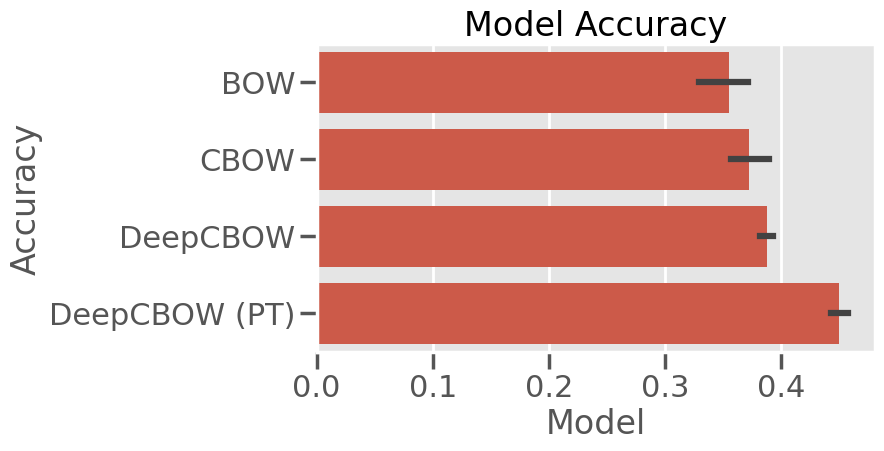

In [69]:
plotting_df = input_df.groupby(["model", "timestamp"])["correct"].mean().reset_index()

fig, ax = plt.subplots(figsize=(7.2, 4))

sns.barplot(plotting_df, y="model", x="correct", ax=ax)

ax.set_title("Model Accuracy")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Model")

fig.savefig("plots/model_accuracy.png", bbox_inches="tight")

/var/folders/yg/dclcb_pd4psb9vd397dx1jdr0000gn/T/ipykernel_80982/3616176485.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()


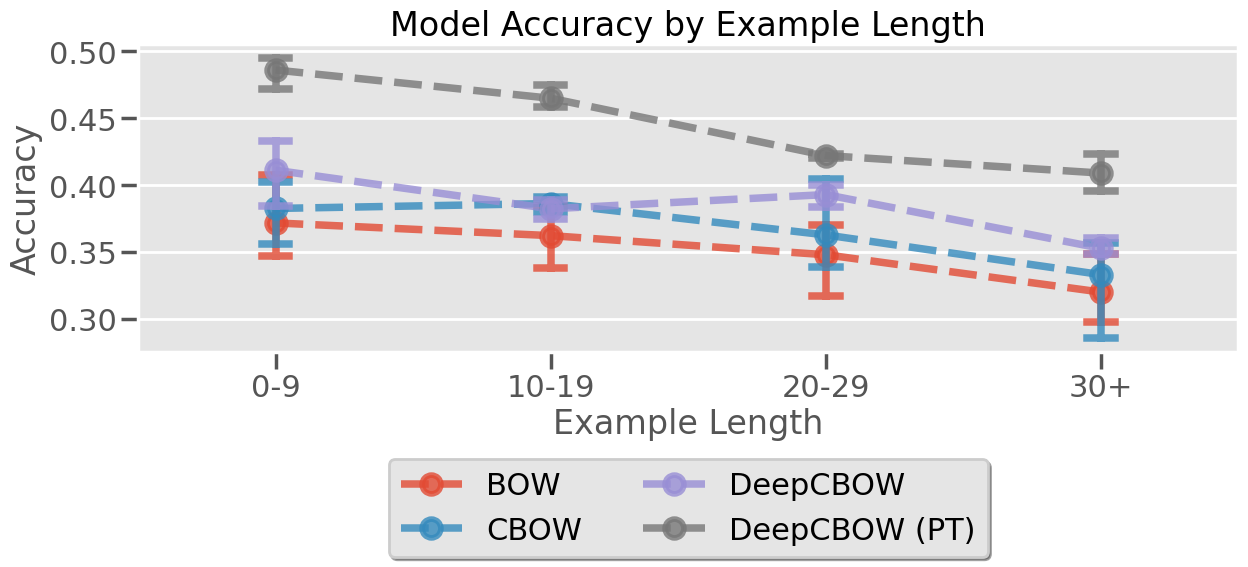

In [70]:
fig, ax = plt.subplots(figsize=(14.2, 4))

plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()
sns.pointplot(
    data=plotting_df,
    x="length_bucket",
    y="correct",
    markers='o',
    capsize=0.1,
    linestyles="--",
    hue="model",
    alpha=0.8
)

ax.set_title("Model Accuracy by Example Length")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Example Length")

# Place legend below the plot horizontally
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=2)

fig.savefig("plots/acc_vs_length.png", bbox_inches="tight")

/var/folders/yg/dclcb_pd4psb9vd397dx1jdr0000gn/T/ipykernel_80982/4284807174.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()


Text(0, 0.5, 'Accuracy')

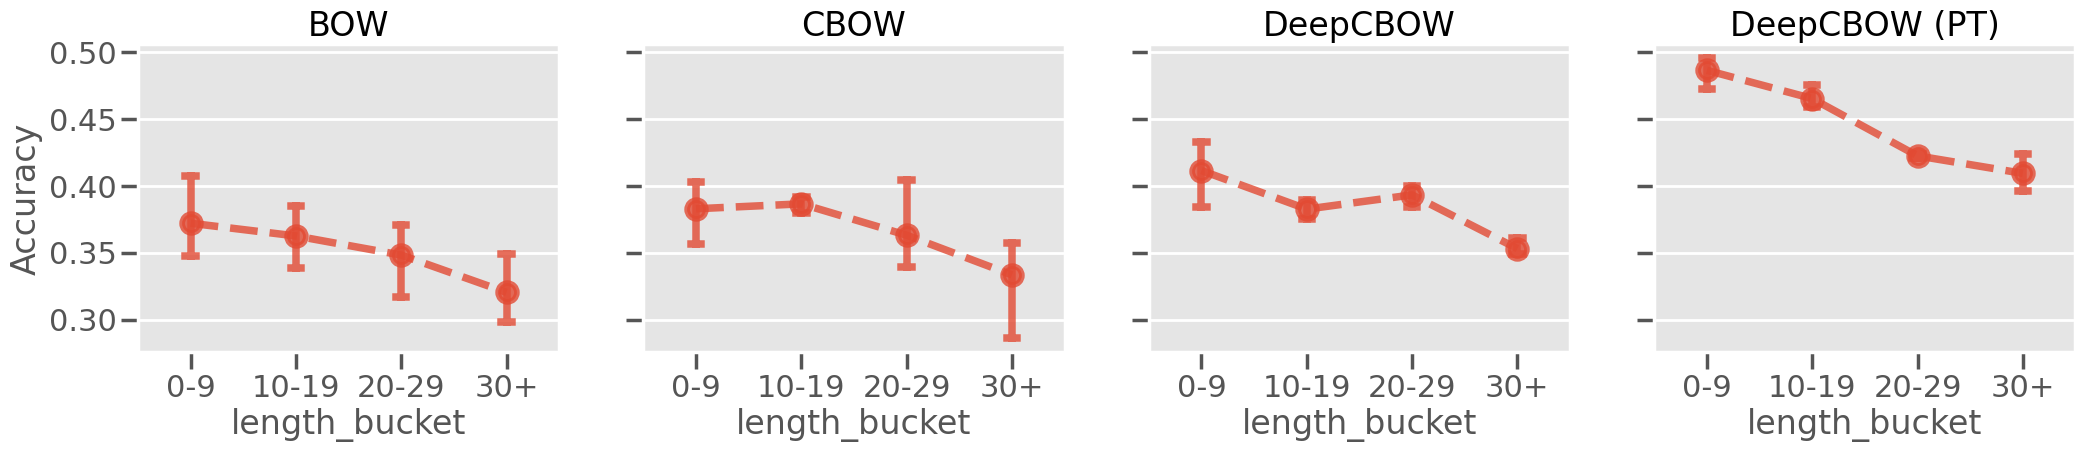

In [75]:
fig, ax = plt.subplots(figsize=(25, 4), ncols=4, sharey=True, sharex=True)

plotting_df = input_df.groupby(["model", "timestamp", "length_bucket"])["correct"].mean().reset_index()

for idx, model in enumerate(plotting_df["model"].unique()):

    sns.pointplot(
        data=plotting_df[plotting_df["model"] == model],
        x="length_bucket",
        y="correct",
        markers='o',
        capsize=0.1,
        linestyles="--",
        # hue="model",
        alpha=0.8,
        ax=ax[idx]
    )
    ax[idx].set_title(f"{model}")

    # ax.set_title("Model Accuracy by Example Length")
    # ax.set_ylabel("Accuracy")
    # ax.set_xlabel("Example Length")

    # # Place legend below the plot horizontally
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=2)

    # fig.savefig("plots/acc_vs_length.png", bbox_inches="tight")
ax[0].set_ylabel("Accuracy")